# GRIP June'21 - The Sparks Foundation

## Data Science and Business Analytics 

## Author: Smriti Gupta

### Task 1: **Prediction using Supervised ML** 

* Predict the percentage of an student based on the no. of study hours. 
* What will be predicted score if a student studies for 9.25 hrs/ day? 
* _LANGUAGE:_ Python
* _DATASET:_ http://bit.ly/w-data


In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
# Reading data from remote link

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

# Viewing the Data

df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Shape of the Dataset

df.shape

(25, 2)

In [4]:
# Checking the information of Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Checking the statistical details of Data

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Checking the correlation between Hours and Scores

corr = df.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
colors = ['#670067','#008080']

# Data Visualization

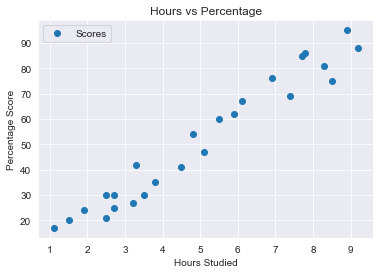

In [8]:
# 2-D graph to establish relationship between the Data and checking for linearity 

sns.set_style('darkgrid')
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Data Preprocessing

In [9]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

# LINEAR REGRESSION MODEL

## Splitting Dataset into training and test sets:

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training the Model

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print('TRAINING COMPLETED.')

TRAINING COMPLETED.


## Predicting the Score

In [12]:
y_predict = regressor.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Scores': [k for k in y_predict]})
prediction

,Hours,Predicted Scores
0,3.5,37.208324
1,4.5,47.035532
2,5.5,56.862740
3,2.7,29.346558
4,9.2,93.223409


In [13]:
print(regressor.intercept_)

2.813097028256877


In [14]:
print(regressor.coef_)

[9.8272078]


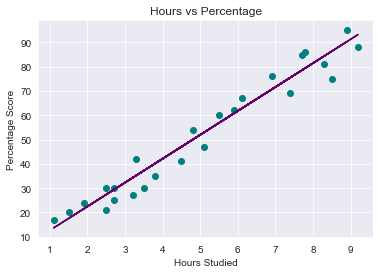

In [15]:
# Plotting the regression line

line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data

plt.scatter(X, y, color = colors[1])
plt.plot(X, line, color = colors[0]);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

## Checking the Accuracy Scores for training and test set

In [16]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.9480612939203932
Training Score
0.953103139564599


## Comparing Actual Scores and Predicted Scores

In [17]:
data= pd.DataFrame({'Actual': y_test,'Predicted': y_predict})
data

,Actual,Predicted
0,30,37.208324
1,41,47.035532
2,60,56.862740
3,30,29.346558
4,88,93.223409


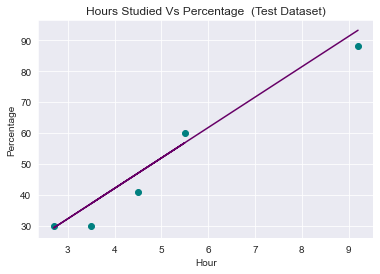

In [18]:
# Visualization comparing Actual Scores and Predicted Scores

plt.scatter(X_test, y_test, color = colors[1])   
plt.plot(X_test, y_predict, color = colors[0])    
plt.title("Hours Studied Vs Percentage  (Test Dataset)")  
plt.xlabel("Hour")  
plt.ylabel("Percentage")  
plt.show()

## Model Evaluation Metrics

In [19]:
#Checking the efficiency of model

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 4.451593449522768
Mean Squared Error: 25.188194900366135
Root Mean Squared Error: 5.018784205399365


# What will be predicted score if a student studies for 9.25 hrs/ day?

In [20]:
hours = 9.25
ans = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(ans[0]))

No of Hours = 9.25
Predicted Score = 93.71476919815156
